# Boundary value problem

### In general case:

$L[y]=y''+p(x)y'+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. Is this method stable for step size $h=0.125$? Find number of grid points required to achieve accuracy of the order of 1e-6.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-6.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [269]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
import scipy.integrate as integrate

In [74]:
alpha = np.array([1, 1])
A = 1
beta = np.array([1, -1])
B = 0
a = 0.5
b = 1.5
N = 1000
x = np.linspace(a, b, N)

In [75]:
p = lambda x: -np.log(x)
p = np.vectorize(p)
q = lambda x: -2
q = np.vectorize(q)
f = lambda x: 1
f = np.vectorize(f)

In [102]:


#1.1.
def SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    h = (b - a)/N
    M = np.zeros((N, N))
    x = np.linspace(a, b, N)
    vf = f(x)*h**2 #делаем правый вектор
    vf[0] = A*h**2
    vf[-1] = B*h**2
    M += (np.diagflat(np.ones(N-1), 1) + np.diagflat(np.ones(N-1), -1) - 2*np.diagflat(np.ones(N)))
    #это вторая производная
    M += h*(np.diagflat(p(x[:-1]), 1)  - np.diagflat(p(x[1:]), -1))/2
    # это первая производная на p
    M += np.diagflat(q(x))*h**2 #это свободный член
    M[0, 0] = alpha[0]*h**2 - 1.5*alpha[1]*h #не придумал ничего лучше, чем написать гран условия вручную
    M[0, 1] = 2*alpha[1]*h
    M[0, 2] = -0.5*alpha[1]*h
    M[-1, -1] = beta[0]*h**2 + 1.5*beta[1]*h
    M[-1, -2] = -2*beta[1]*h
    M[-1, -3] = 0.5*beta[1]*h
    return solve(M, vf)

#1.2.
def FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    h = (b - a)/N
    M = np.zeros((N, N))
    x = np.linspace(a, b, N)
    vf = f(x)*h**2 #делаем правый вектор
    vf[0] = A*h**2
    vf[-1] = B*h**2
    M += (np.diagflat(np.ones(N-1), 1) + np.diagflat(np.ones(N-1), -1) - 2*np.diagflat(np.ones(N)))
    #это вторая производная
    M += (np.diagflat(p(x[:-1]), 1)  - np.diagflat(p(x)))*h
    # это первая производная на p
    M += np.diagflat(q(x))*h**2 #это свободный член
    M[0, 0] = alpha[0]*h**2 - alpha[1]*h #не придумал ничего лучше, чем написать гран условия вручную
    M[0, 1] = alpha[1]*h
    M[-1, -1] = beta[0]*h**2 + beta[1]*h
    M[-1, -2] = -beta[1]*h
    return solve(M, vf)

In [103]:
from timeit import default_timer as timer

In [104]:
start = timer()
y1 = FirstOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
end = timer()
print(end - start)

start = timer()
y2 = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
end = timer()
print(end - start) 



0.10023233399988385
0.06230961999972351


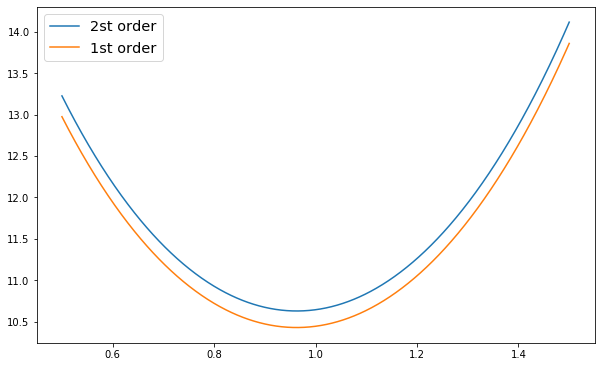

In [105]:
fig, ax = plt.subplots(figsize = (10, 6.18))
ax.plot(x, y2, label = '2st order')
ax.plot(x, y1, label = '1st order')
ax.legend(fontsize = 14.53)

In [101]:
y2[499]

10.644899216423063

А вольфрам говорит что должно быть $\approx 10.7595$ ну ладно, кажется терпимо. Если сравнивать с картинкой, которую рисует вольфрам, то метод второго порядка ближе к правде (ожидаемо)  
От меня хотят увидеть $h = 0.125$, ну это можно

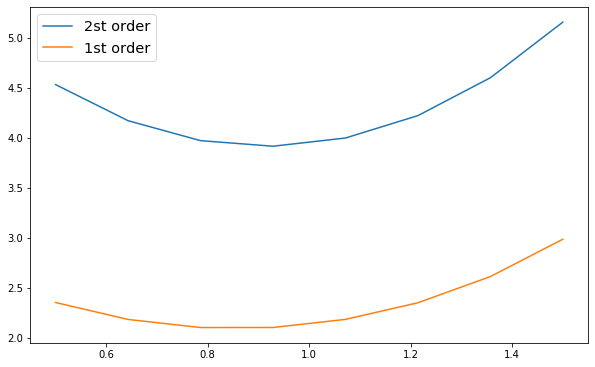

In [40]:
N = 8
x = np.linspace(a, b, N)
y1 = FirstOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
y2 = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
fig, ax = plt.subplots(figsize = (10, 6.18))
ax.plot(x, y2, label = '2st order')
ax.plot(x, y1, label = '1st order')
ax.legend(fontsize = 14.53)

Ничего общего с реальностью

In [59]:
res = 2
N = 8
y1 = FirstOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
while res > 1e-1:
    N = 2*N
    print('lol')
    if N > 9000:
        break
    ynew = FirstOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
    ynew2 = ynew.reshape(-1, 2)[:, 0] #выкидываем каждый второй
    res = np.max(np.abs(y1 - ynew2))
    y1 = ynew
print(N)

lol
lol
lol
lol
lol
lol
lol
lol
lol
4096


In [43]:
res = 2
N = 8
y2 = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
while res > 1e-2:
    N = 2*N
    print('lol')
    if N > 9000:
        break
    ynew = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
    ynew2 = ynew.reshape(-1, 2)[:, 0] #выкидываем каждый второй
    res = np.max(np.abs(y2 - ynew2))/3
    y2 = ynew
print(N)

lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
8192


Ну не выходит точнее, не знаю я почему

# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [291]:
alpha = np.array([1, 0])
A = 1
beta = np.array([1, 0])
B = 0.5
a = 1
b = 2
N = 1000
x1 = np.linspace(a, b, N)

In [107]:
p = lambda x: 2
p = np.vectorize(p)
q = lambda x: -3*x
q = np.vectorize(q)
f = lambda x: (2 - 8*x)/x**3
f = np.vectorize(f)

In [108]:
start = timer()
y4 = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
end = timer()
print(end - start) 

0.10948004099918762


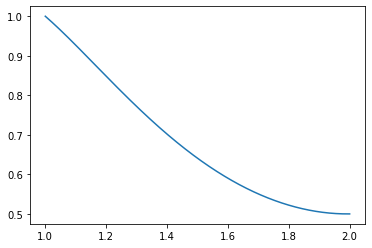

In [109]:
plt.plot(x1, y4)

In [64]:
res = 2
N = 8
y2 = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
while res > 1e-5:
    N = 2*N
    print('lol')
    if N > 9000:
        break
    ynew = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
    ynew2 = ynew.reshape(-1, 2)[:, 0] #выкидываем каждый второй
    res = np.max(np.abs(y2 - ynew2))/3
    y2 = ynew
print(N)

lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
8192


Тут повеселей. Видимо помогает то, что граничные точки зафиксированны

Базисные полиномы должны быть что-то типа $(2-x)x^k + 0.5(x - 1)$ чтобы удовлетворять граничным условиям

In [249]:
def get_basis(k): #по строкам будут наши базисные вектора
    basis = np.zeros((k, k+2))
    one = np.zeros(k+2)
    one2 = np.zeros(k+2)
    one[-1] = 2
    one[-2] = -1
    one2[-1] = -0.5
    one2[-2] = 0.5
    for i in np.arange(k):
        one3 = np.zeros(k+2)
        one3[k+1 -i] = 1
        basis[i] = np.convolve(one3, one)[k+1:] +one2
    return basis 

In [261]:
def get_Lbasis(basis, k):#это фунция после того как на нее подействовал оператор L
    Lbasis = np.zeros((k, k+2))
    for i in np.arange(k):
        y = basis[i]
        Lbasis[i] = np.pad(np.polyder(y, 2),(2, 0)) + 2*np.pad(np.polyder(y),(1, 0)) - 3*np.convolve(y, [1, 0])[1:]
    return Lbasis

In [265]:
def Am(basis, Lbasis, k):
    A = np.zeros((k, k))
    for i in np.arange(k):
        for j in np.arange(k):
            y = np.convolve(basis[i], Lbasis[j])
            iny = np.polyint(y)
            A[i, j] = np.polyval(iny, 2) - np.polyval(iny, 1)
    return A

In [274]:
def get_d(f, basis, k):
    d = np.zeros(k)
    for i in np.arange(k):
        d[i] = integrate.quad(lambda x: f(x)*np.polyval(basis[i], x), 1, 2)[0]
    return d

In [293]:
k = 7
basis = get_basis(k)
Lbasis = get_Lbasis(basis, k)
M = Am(basis, Lbasis, k)
d = get_d(f, basis, k)
c = solve(M, d)
print(c)
poly = np.zeros(k+2)
for i in range(k): #мне рил лень думать как это сделать нормально
    poly += basis[i]*c[i]
func = lambda x: np.polyval(poly, x)

[ 1.43985096e+01 -3.04545064e+01  2.66435571e+01 -1.32742402e+01
  3.70575429e+00 -5.38577645e-01  2.24348645e-02]


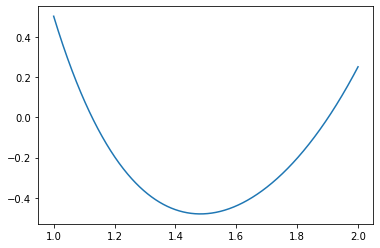

In [294]:
plt.plot(x1, func(x1))

Ну провал и провал. Что поделать, все равно нет ни сил, ни желания разбираться что тут не так.  

## Поставьте троечку, пожалуйста